<a href="https://colab.research.google.com/github/swaingotnochill/ML/blob/master/Pulsar_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving pulsar_data_train.csv to pulsar_data_train.csv


In [3]:
import pandas as pd

In [4]:
dataset= pd.read_csv('/content/pulsar_data_train.csv')
print(dataset)

        Mean of the integrated profile  ...  target_class
0                           121.156250  ...           0.0
1                            76.968750  ...           0.0
2                           130.585938  ...           0.0
3                           156.398438  ...           0.0
4                            84.804688  ...           0.0
...                                ...  ...           ...
12523                       124.312500  ...           0.0
12524                       115.617188  ...           0.0
12525                       116.031250  ...           0.0
12526                       135.664062  ...           0.0
12527                       120.726562  ...           0.0

[12528 rows x 9 columns]


In [10]:
dataset_drop= dataset.copy()
dataset_drop.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [11]:
dataset_drop=dataset_drop.dropna(axis=1)
dataset_drop.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', 'target_class'],
      dtype='object')

Checking the columns or the features, I am going to work with. It is important to know these, because sometimes dataset has some parameters which might not be equally important for our work and we can work without that particular column, that can be known with more and more data visualisation. 

In [12]:
dataset.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

We can see there are 8-9 columns and for pulsars they look pretty important.

In [13]:
dataset.head(9)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
5,121.007812,47.176944,0.229708,0.091336,2.036789,NaN,9.546051,112.131721,0.0
6,79.343750,42.402174,1.063413,2.244377,141.641304,NaN,-0.700809,-1.200653,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0
8,95.007812,40.219805,0.347578,1.153164,2.770067,18.217741,7.851205,70.801938,0.0


I get one important insight from the above table, that is there are some values which are NAN, empty or infinite but they will be treated as outliers only.

Checking the data to gain more intuitive insights, which is always a good practice.

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [15]:
dataset.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [16]:
dataset.describe(include='all')

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


As I could earlier see NAN values, thus going for the important statistical parameters using the describle function. I can see that although total elements are 12528 but some columns have entries less than that, that is there are empty pockets.

It will be more clear if we try to form these data distribution. As I can see the describe function gives me parameters for integrated profile as well as DM-SNR curve. 

Physically speaking, one major parameter for Pulsars are indeed Dispersion Measure and how it behaves with Signal-to-Noise Ratio. 

In [17]:
dataset.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                     float64
dtype: object

Thus I can now be sure of one thing, all are integer or numeric type features, there is nothing here which are textual or need to be taken care of. 

## Visualisation of data 

I will be using seaborn and matplotlib to make some visual insights for the data. I will import them here for now.

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

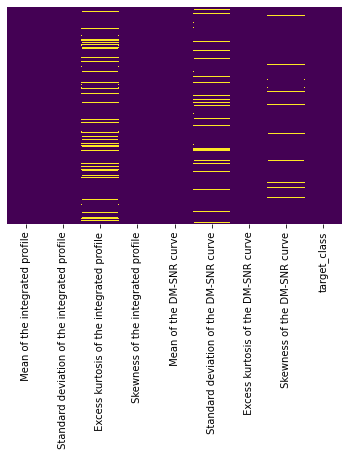

In [19]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis')

As suspected the three columns are indeed showing a lot of empty values

Trying to find where these empty values are: 

In [ ]:
dataset.isnull().sum()

In [ ]:
dataset['target_class'].tail(10)

To check how many positive candidates are there which will be actually helpful in training my model to detect pulsars.

In [ ]:
#for columns in dataset.columns[:-1]:
#   print(dataset[columns])
count= len(dataset[dataset['target_class']==1])
print("Number of positive candidates: {}".format(count))
print("Number of negative candidates: {}".format(len(dataset)-count))

In [ ]:
dataset.columns[:-1].size
fig, axes = plt.subplots(nrows=len(dataset.columns[:-1]),ncols=1,  figsize=(15, 40))
for i in range(len(dataset.columns[:-1])):
    feature = dataset.columns[i]
    plt.figure(figsize = (5, 5))
    data=dataset.copy()
    sns.histplot(x=data[feature].dropna(), ax=axes[i])

There indeed is some need of data normalisation as although almost all data is normalised functions but still we cannot afford to have a biased data.

Target Class based plotting can give us more help to know what are the trends for pulsars and what are the trends for other objects in the dataset.

In [ ]:
data_copy= dataset.copy()
for features in dataset.columns[:-1]:
    plt.figure(figsize = (10, 5))
    sns.boxplot(x = 'target_class', y = features, data = data_copy)
    plt.grid()
    plt.show()

Now some data was missing, I can go in two ways, either to just ignore those data points completely, or to somehow predict those missing values to a very good accuracy and then consider that filled dataset for model.

I will go for the second choice as you can already see, there are very less positive pulsars to train the model for true results, we cannot afford to discard any of those data. 

Perhaps if we know how much the 3 columns with missing values are related with the other parameters, we can choose to ignore that input feature in the model. 

For now I will try to fill in the values and consider complete data or I will try to ignore some features, its upto my experimentation.

In [ ]:
dataset.isnull().sum()
len(dataset)
dataset.isnull().sum()/len(dataset) * 100

Excess curtosis has 13% of the values as null and Std. Deviation of DM-SNR curve is also pretty close to 10%

Lets try to form a dataset with null value data points only to be computed by machine.


In [ ]:
null_dataset= dataset[dataset.isnull().any(axis=1)]
null_dataset

In [ ]:
null_dataset.columns

In [ ]:
length=len(null_dataset)
length2=len(null_dataset[null_dataset[' Excess kurtosis of the integrated profile'].isnull() & 
      null_dataset[' Standard deviation of the DM-SNR curve'].isnull()])
length3=len(null_dataset[null_dataset[' Excess kurtosis of the integrated profile'].isnull() & 
      null_dataset[' Skewness of the DM-SNR curve'].isnull()])
length4= len(null_dataset[null_dataset[' Skewness of the DM-SNR curve'].isnull() &  
      null_dataset[' Standard deviation of the DM-SNR curve'].isnull()])
length5= len(null_dataset[null_dataset[' Excess kurtosis of the integrated profile'].isnull() & 
      null_dataset[' Standard deviation of the DM-SNR curve'].isnull() & 
      null_dataset[' Skewness of the DM-SNR curve'].isnull()])
print(length)
print(length2)
print(length3)
print(length4)
print(length5)

In [ ]:
dataset_drop.head(15)

##DataLoader and Pytorch ready data

In [21]:
input_cols= [title for title in dataset_drop.columns[:-1]]
output_cols= [dataset_drop.columns[-1]]
input_cols
print(output_cols)

['target_class']


In [22]:
inputs_array = dataset_drop[input_cols].to_numpy()
targets_array = dataset_drop[output_cols].to_numpy()
inputs_array, targets_array

(array([[ 1.21156250e+02,  4.83729711e+01, -1.31654890e-02,
          3.16889632e+00,  7.44987415e+00],
        [ 7.69687500e+01,  3.61755566e+01,  3.38871856e+00,
          2.39966555e+00,  9.41465226e+00],
        [ 1.30585938e+02,  5.32295335e+01, -2.97241641e-01,
          2.74331104e+00,  8.50836378e+00],
        ...,
        [ 1.16031250e+02,  4.32138464e+01,  4.33087971e-01,
          7.85117057e-01,  1.70552145e+01],
        [ 1.35664062e+02,  4.99337494e+01, -2.26726179e-01,
          3.85953177e+00,  7.39839490e+00],
        [ 1.20726562e+02,  5.04722564e+01,  1.84797225e-01,
          7.69230769e-01,  1.76622219e+01]]), array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]))

In [23]:
dataset_drop[input_cols].describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Excess kurtosis of the DM-SNR curve
count,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000
mean,111.041841,46.521437,1.778431,12.674758,8.333489
std,25.672828,6.801077,6.208450,29.613230,4.535783
min,5.812500,24.772042,-1.791886,0.213211,-3.139270
25%,100.871094,42.362222,-0.188142,1.910535,5.803063
50%,115.183594,46.931022,0.203317,2.792642,8.451097
75%,127.109375,50.979103,0.932374,5.413253,10.727927
max,189.734375,91.808628,68.101622,222.421405,34.539844


In [24]:
import torch

In [26]:
inputs= torch.tensor(inputs_array, dtype=torch.float32)
targets= torch.tensor(targets_array, dtype=torch.float32)

In [27]:
from torch.utils.data import DataLoader,TensorDataset,random_split

In [28]:
data=TensorDataset(inputs, targets)

In [29]:
val_percent=0.11
num_rows= len(dataset_drop)
val_size = int(num_rows * val_percent)
train_size = num_rows - val_size
train_ds, val_ds= random_split(data,[train_size, val_size])

In [30]:
batch_size=128

In [31]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [32]:
for xb, yb in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[ 1.1820e+02,  5.6377e+01, -7.3409e-01,  1.2679e+02, -9.7556e-01],
        [ 1.3752e+02,  5.4068e+01, -3.4157e-01,  2.2508e+00,  9.6392e+00],
        [ 1.3058e+02,  5.3087e+01, -3.2466e-01,  2.0251e+00,  1.0620e+01],
        [ 1.1171e+02,  4.6571e+01, -6.1646e-02,  2.1396e+00,  9.3539e+00],
        [ 1.2481e+02,  5.3153e+01, -5.6557e-03,  8.2207e+00,  5.1466e+00],
        [ 1.3683e+02,  5.0746e+01,  1.6600e-05,  5.1865e+00,  6.0959e+00],
        [ 8.3891e+01,  3.8127e+01,  2.1013e+00,  2.0067e+00,  1.0443e+01],
        [ 1.3532e+02,  4.3396e+01,  4.9394e-01,  4.3813e+00,  6.1028e+00],
        [ 1.0527e+02,  5.1276e+01, -3.2684e-01,  1.3696e+00,  1.3353e+01],
        [ 1.2736e+02,  4.1044e+01,  7.3474e-01,  2.2834e+00,  9.6498e+00],
        [ 1.4334e+02,  4.5785e+01, -9.5695e-02,  2.6455e+00,  8.5263e+00],
        [ 3.5352e+01,  3.1464e+01,  2.7059e+01,  1.8728e+01,  3.1161e+00],
        [ 1.3302e+02,  6.0887e+01, -8.6378e-01,  3.4529e+01,  2.0285e+00],
        [ 1.0534e

In [66]:
yb.shape

torch.Size([128, 1])

In [34]:
input_size= len(input_cols)
output_size= len(output_cols)

In [35]:
import torch.nn as nn
import torch.nn.functional as F

In [36]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [77]:
class PulsarLogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear= nn.Linear(input_size,output_size)
    def forward(self,xb):
        out= self.linear(xb)
        return out

    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        loss = F.cross_entropy(out,targets)                         # fill this
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        targets = targets.flatten()
        loss = F.cross_entropy(out,targets)
        acc = accuracy(out, targets)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc} # fill this    
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))


In [83]:
targets.shape

torch.Size([12528, 1])

In [78]:
model = PulsarLogisticRegression()

In [79]:
list(model.parameters())


[Parameter containing:
 tensor([[ 0.3331, -0.2380,  0.3358, -0.2656,  0.1914]], requires_grad=True),
 Parameter containing:
 tensor([0.0566], requires_grad=True)]

In [80]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [81]:
result = evaluate(model, val_loader) # Use the the evaluate function
print(result)

RuntimeError: ignored

In [ ]:
epochs = 10
lr = 1e-1
history1 = fit(epochs, lr, model, train_loader, val_loader)